# Homework 2 with part 2 Matplotlib

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [34]:
df = pd.read_csv("weather-check.csv")

In [35]:
print(df.columns)

Index(['RespondentID', 'Do you typically check a daily weather report?',
       'How do you typically check the weather?',
       'A specific website or app (please provide the answer)',
       'If you had a smartwatch (like the soon to be released Apple Watch), how likely or unlikely would you be to check the weather on that device?',
       'Age', 'What is your gender?',
       'How much total combined money did all members of your HOUSEHOLD earn last year?',
       'US Region'],
      dtype='object')


In [36]:
df.head()

,RespondentID,Do you typically check a daily weather report?,How do you typically check the weather?,A specific website or app (please provide the answer),"If you had a smartwatch (like the soon to be released Apple Watch), how likely or unlikely would you be to check the weather on that device?",Age,What is your gender?,How much total combined money did all members of your HOUSEHOLD earn last year?,US Region
0,3887201482,Yes,The default weather app on your phone,-,Very likely,30 - 44,Male,"$50,000 to $74,999",South Atlantic
1,3887159451,Yes,The default weather app on your phone,-,Very likely,18 - 29,Male,Prefer not to answer,-
2,3887152228,Yes,The default weather app on your phone,-,Very likely,30 - 44,Male,"$100,000 to $124,999",Middle Atlantic
3,3887145426,Yes,The default weather app on your phone,-,Somewhat likely,30 - 44,Male,Prefer not to answer,-
4,3887021873,Yes,A specific website or app (please provide the ...,Iphone app,Very likely,30 - 44,Male,"$150,000 to $174,999",Middle Atlantic


In [37]:
df.describe(include = 'all')

,RespondentID,Do you typically check a daily weather report?,How do you typically check the weather?,A specific website or app (please provide the answer),"If you had a smartwatch (like the soon to be released Apple Watch), how likely or unlikely would you be to check the weather on that device?",Age,What is your gender?,How much total combined money did all members of your HOUSEHOLD earn last year?,US Region
count,9.280000e+02,928,928,928,928,928,928,928,928
unique,NaN,2,9,122,5,5,3,12,10
top,NaN,Yes,The default weather app on your phone,-,Very likely,45 - 59,Female,Prefer not to answer,Pacific
freq,NaN,746,213,753,362,278,527,169,185
mean,3.879108e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,2.479463e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,3.877549e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,3.877793e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,3.878061e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,3.878774e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [38]:
df.loc[df['US Region'] != '-']['US Region'].unique()

array(['South Atlantic', 'Middle Atlantic', 'West South Central',
       'Pacific', 'West North Central', 'East North Central', 'Mountain',
       'New England', 'East South Central'], dtype=object)

In [39]:
renamed_quesitons = {
    'Do you typically check a daily weather report?': 'Question 1',
    'How do you typically check the weather?': 'Question 2',
       'A specific website or app (please provide the answer)': 'Question 3',
       'If you had a smartwatch (like the soon to be released Apple Watch), how likely or unlikely would you be to check the weather on that device?': 'Question 4',
       'How much total combined money did all members of your HOUSEHOLD earn last year?': 'Question 5',
}

In [40]:
df.rename(columns = renamed_quesitons, inplace = True)

In [41]:
df.head()

,RespondentID,Question 1,Question 2,Question 3,Question 4,Age,What is your gender?,Question 5,US Region
0,3887201482,Yes,The default weather app on your phone,-,Very likely,30 - 44,Male,"$50,000 to $74,999",South Atlantic
1,3887159451,Yes,The default weather app on your phone,-,Very likely,18 - 29,Male,Prefer not to answer,-
2,3887152228,Yes,The default weather app on your phone,-,Very likely,30 - 44,Male,"$100,000 to $124,999",Middle Atlantic
3,3887145426,Yes,The default weather app on your phone,-,Somewhat likely,30 - 44,Male,Prefer not to answer,-
4,3887021873,Yes,A specific website or app (please provide the ...,Iphone app,Very likely,30 - 44,Male,"$150,000 to $174,999",Middle Atlantic


In [42]:
questions = ['Question 1', 'Question 2', 'Question 3', 'Question 4', 'Question 5' ]

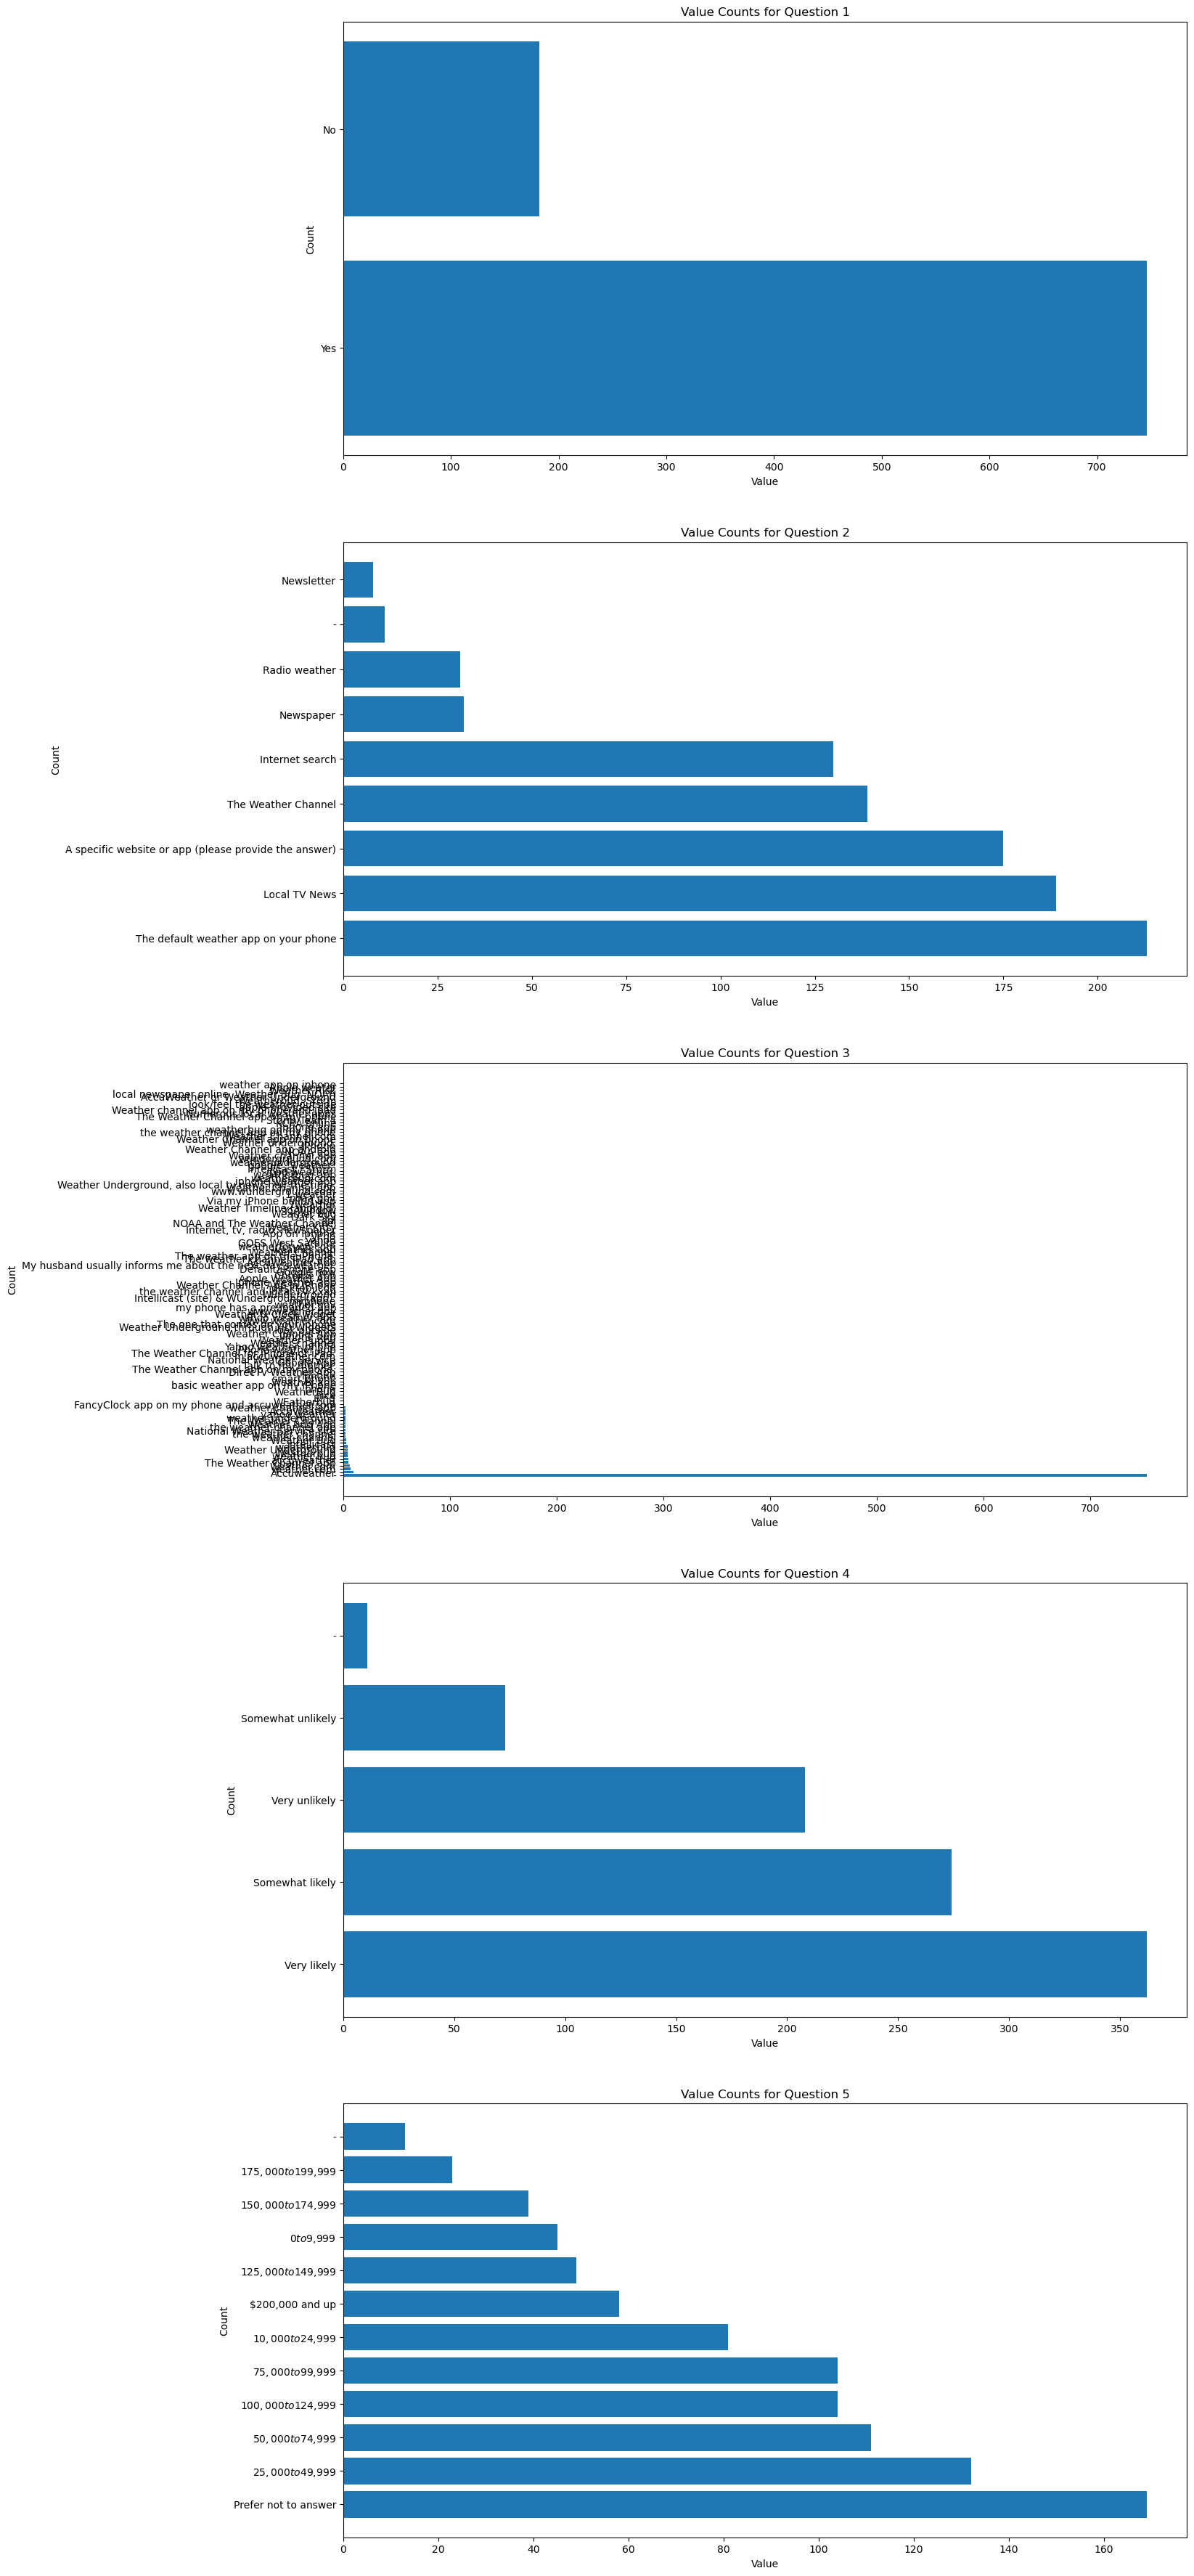

In [43]:

# Plotting
fig, axs = plt.subplots(len(df[questions].columns), 1, figsize=(15, 5 * len(df.columns)))
for i, column in enumerate(df[questions].columns):
    value_counts = df[column].value_counts()
    axs[i].barh(value_counts.index.astype(str), value_counts.values)
    axs[i].set_title(f'Value Counts for {column}')
    axs[i].set_xlabel('Value')
    axs[i].set_ylabel('Count')
plt.show()


In [44]:
df = df.loc[df['US Region'] != '-']

In [45]:
df_grouped_region = df.groupby('US Region')['Question 4'].value_counts()

In [46]:
df_grouped_region

US Region           Question 4       
East North Central  Very likely          63
                    Somewhat likely      38
                    Very unlikely        30
                    Somewhat unlikely    10
East South Central  Very likely          16
                    Somewhat likely      11
                    Very unlikely         8
                    Somewhat unlikely     6
Middle Atlantic     Very likely          45
                    Very unlikely        28
                    Somewhat likely      23
                    Somewhat unlikely     8
Mountain            Very likely          28
                    Somewhat likely      19
                    Very unlikely        18
                    Somewhat unlikely     7
New England         Very likely          22
                    Somewhat likely      16
                    Very unlikely        10
                    Somewhat unlikely     4
Pacific             Somewhat likely      67
                    Very likely       

In [47]:
df_grouped_region = df_grouped_region.reset_index(name='count')

In [48]:
df_grouped_region

,US Region,Question 4,count
0,East North Central,Very likely,63
1,East North Central,Somewhat likely,38
2,East North Central,Very unlikely,30
3,East North Central,Somewhat unlikely,10
4,East South Central,Very likely,16
5,East South Central,Somewhat likely,11
6,East South Central,Very unlikely,8
7,East South Central,Somewhat unlikely,6
8,Middle Atlantic,Very likely,45
9,Middle Atlantic,Very unlikely,28


In [49]:
pivot_df = df_grouped_region.pivot(index='US Region', columns='Question 4', values='count').fillna(0)

In [50]:
pivot_df

Question 4,Somewhat likely,Somewhat unlikely,Very likely,Very unlikely
US Region,,,,
East North Central,38,10,63,30
East South Central,11,6,16,8
Middle Atlantic,23,8,45,28
Mountain,19,7,28,18
New England,16,4,22,10
Pacific,67,18,55,45
South Atlantic,47,8,74,25
West North Central,21,3,18,12
West South Central,25,7,37,25


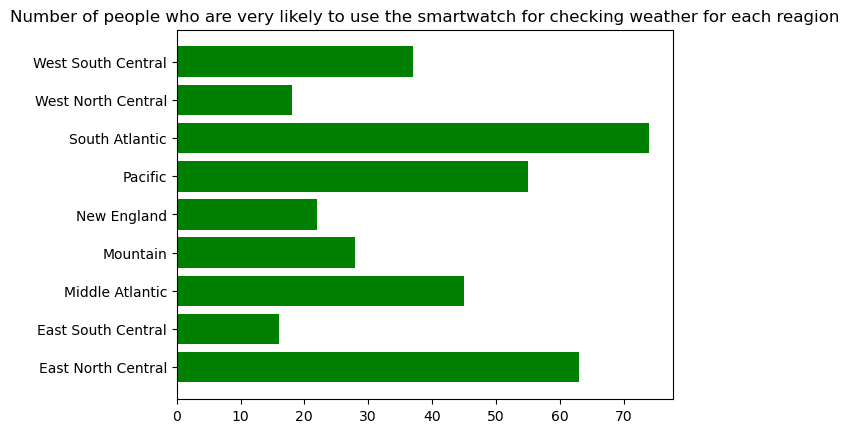

In [51]:
fig = plt.figure()

ax = fig.add_axes(111)

x = pivot_df.index.to_list()
y = pivot_df['Very likely'].to_list()
ax.barh(x,y,color = 'green')

ax.set_title('Number of people who are very likely to use the smartwatch for checking weather for each reagion')
plt.show()

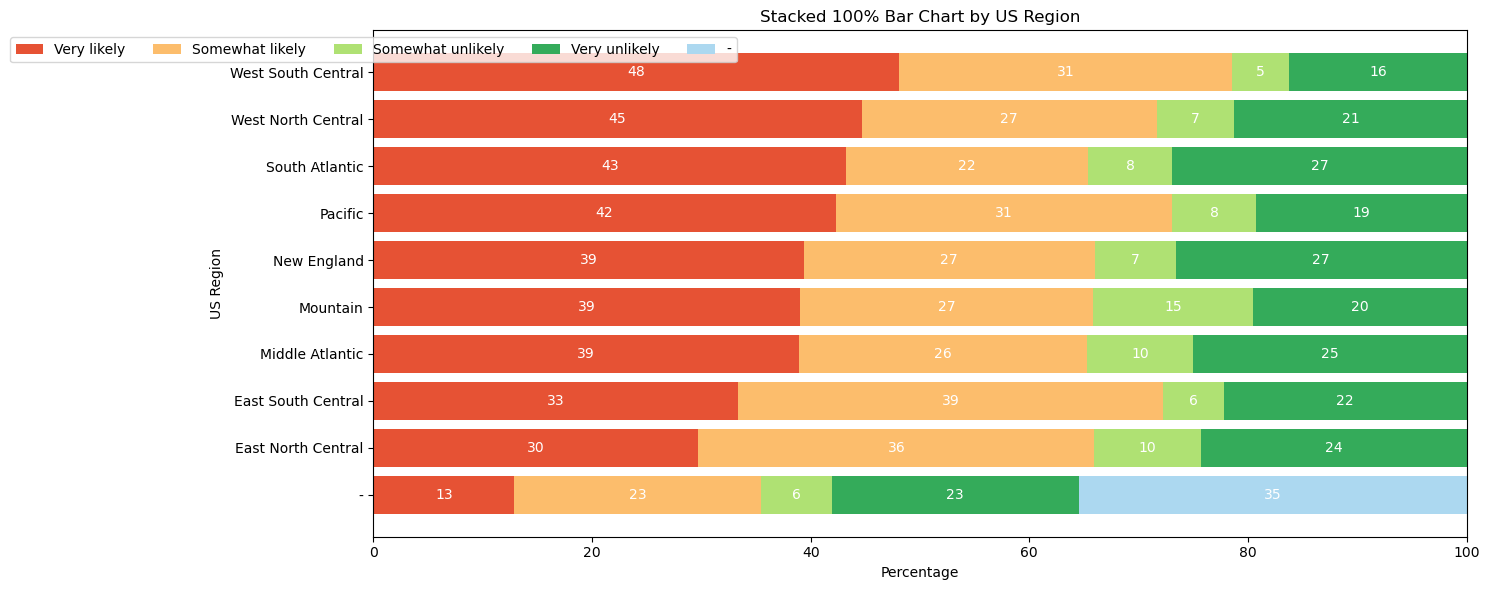

In [52]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming pivot_df_percent contains the percentages for each 'Question 4' option by 'US Region'
# Assume pivot_df_percent is already computed and contains the correct percentage data
df = pd.read_csv("weather-check.csv")
df.rename(columns = renamed_quesitons, inplace = True)
df_grouped_region = df.groupby('US Region')['Question 4'].value_counts()
df_grouped_region = df_grouped_region.reset_index(name='count')
pivot_df = df_grouped_region.pivot(index='US Region', columns='Question 4', values='count').fillna(0)
pivot_df_percent = pivot_df.div(pivot_df.sum(axis=1), axis=0) * 100
pivot_df_percent_sorted = pivot_df_percent.sort_values(by='Very likely', ascending=True)
pivot_df_percent_T = pivot_df_percent_sorted.T
# Define the desired order of the options
desired_order = ['Very likely', 'Somewhat likely', 'Somewhat unlikely', 'Very unlikely', '-']

# Update the dictionary for 'Very unlikely' to have a unique color if needed
colors_map = {
    'Very likely': '#e65234',
    'Somewhat likely': '#fcbd6c',
    'Somewhat unlikely': '#afe173',
    'Very unlikely': '#34ab5a',  # Assuming you want a unique color for 'Very unlikely'
    '-': '#acd8f0'  # Adjusted for visibility
}

# Sort options according to the desired order
pivot_df_percent_T = pivot_df_percent_T.loc[desired_order]

regions = pivot_df_percent.index
options = pivot_df_percent_T.index

# Ensure you have a color for each option, or update the dictionary accordingly
colors = [colors_map[option] for option in options]

# Plotting each set of bars
lefts = np.zeros(len(regions))  # Starting points for each bar

fig, ax = plt.subplots(figsize=(15, 6))
for option, color in zip(options, colors):
    heights = pivot_df_percent_T.loc[option].values  # Percentage values for this option
    plt.barh(regions, heights, color=color, left=lefts, label=option)
    
    # Add text annotations for each bar segment
    for i, (region, height) in enumerate(zip(regions, heights)):
        if height > 0:  # Only add annotations for non-zero values
            plt.text(lefts[i] + height/2, i, f'{height:.0f}', ha='center', va='center', color='white', fontsize=10)
    
    lefts += heights  # Update starting points for next set of bars

# Adding labels, title, and legend
plt.xlabel('Percentage')
plt.ylabel('US Region')
plt.title('Stacked 100% Bar Chart by US Region')
plt.legend( bbox_to_anchor=(0, 1), loc='upper center', ncol = len(options))

# Adjust layout and show plot
plt.tight_layout()
# plt.subtitle('Subtitle')
plt.show()

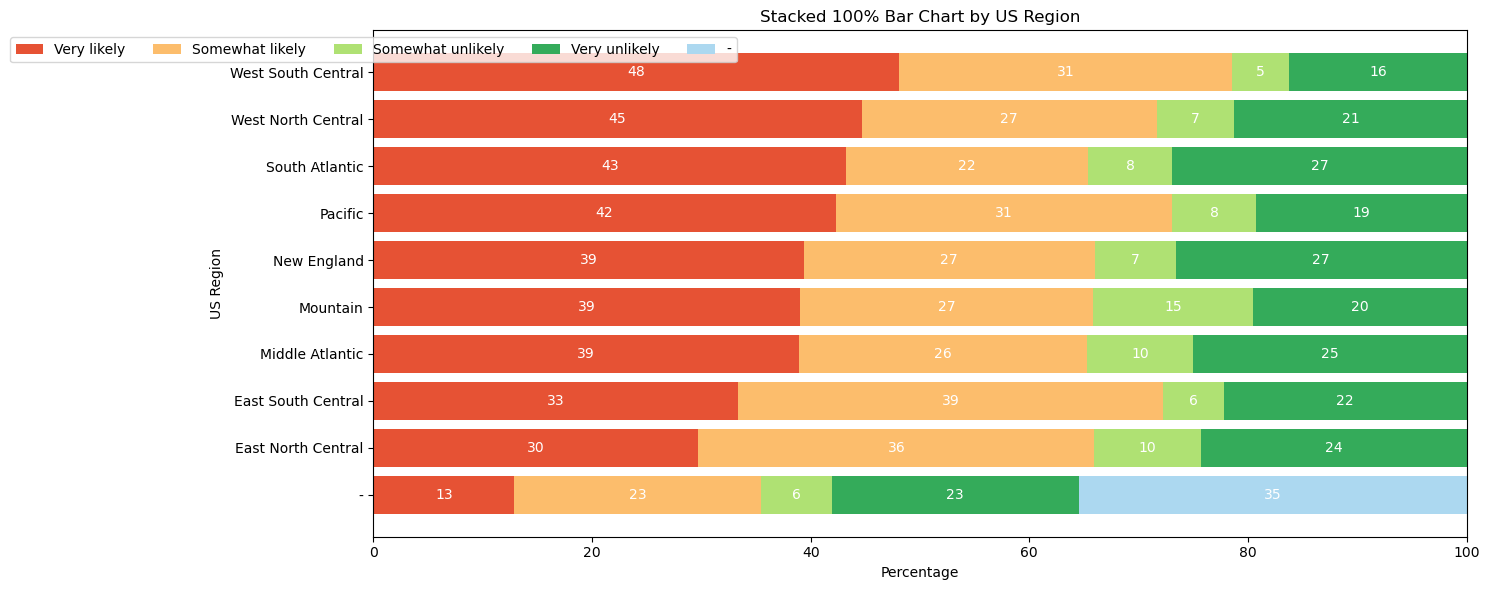

In [53]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming pivot_df_percent contains the percentages for each 'Question 4' option by 'US Region'
# Assume pivot_df_percent is already computed and contains the correct percentage data
df = pd.read_csv("weather-check.csv")
df.rename(columns = renamed_quesitons, inplace = True)
df_grouped_region = df.groupby('US Region')['Question 4'].value_counts()
df_grouped_region = df_grouped_region.reset_index(name='count')
pivot_df = df_grouped_region.pivot(index='US Region', columns='Question 4', values='count').fillna(0)
pivot_df_percent = pivot_df.div(pivot_df.sum(axis=1), axis=0) * 100
pivot_df_percent_sorted = pivot_df_percent.sort_values(by='Very likely', ascending=True)
pivot_df_percent_T = pivot_df_percent_sorted.T
# Define the desired order of the options
desired_order = ['Very likely', 'Somewhat likely', 'Somewhat unlikely', 'Very unlikely', '-']

# Update the dictionary for 'Very unlikely' to have a unique color if needed
colors_map = {
    'Very likely': '#e65234',
    'Somewhat likely': '#fcbd6c',
    'Somewhat unlikely': '#afe173',
    'Very unlikely': '#34ab5a',  # Assuming you want a unique color for 'Very unlikely'
    '-': '#acd8f0'  # Adjusted for visibility
}

# Sort options according to the desired order
pivot_df_percent_T = pivot_df_percent_T.loc[desired_order]

regions = pivot_df_percent.index
options = pivot_df_percent_T.index

# Ensure you have a color for each option, or update the dictionary accordingly
colors = [colors_map[option] for option in options]

# Plotting each set of bars
lefts = np.zeros(len(regions))  # Starting points for each bar

fig, ax = plt.subplots(figsize=(15, 6))
for option, color in zip(options, colors):
    heights = pivot_df_percent_T.loc[option].values  # Percentage values for this option
    plt.barh(regions, heights, color=color, left=lefts, label=option)
    
    # Add text annotations for each bar segment
    for i, (region, height) in enumerate(zip(regions, heights)):
        if height > 0:  # Only add annotations for non-zero values
            plt.text(lefts[i] + height/2, i, f'{height:.0f}', ha='center', va='center', color='white', fontsize=10)
    
    lefts += heights  # Update starting points for next set of bars

# Adding labels, title, and legend
plt.xlabel('Percentage')
plt.ylabel('US Region')
plt.title('Stacked 100% Bar Chart by US Region')
plt.legend( bbox_to_anchor=(0, 1), loc='upper center', ncol = len(options))

# Adjust layout and show plot
plt.tight_layout()
# plt.subtitle('Subtitle')
plt.show()

In [54]:
pivot_df_sorted = pivot_df.sort_values(by='Very likely', ascending=True)
pivot_df_T = pivot_df_sorted.T
pivot_df_T = pivot_df_T.loc[desired_order]

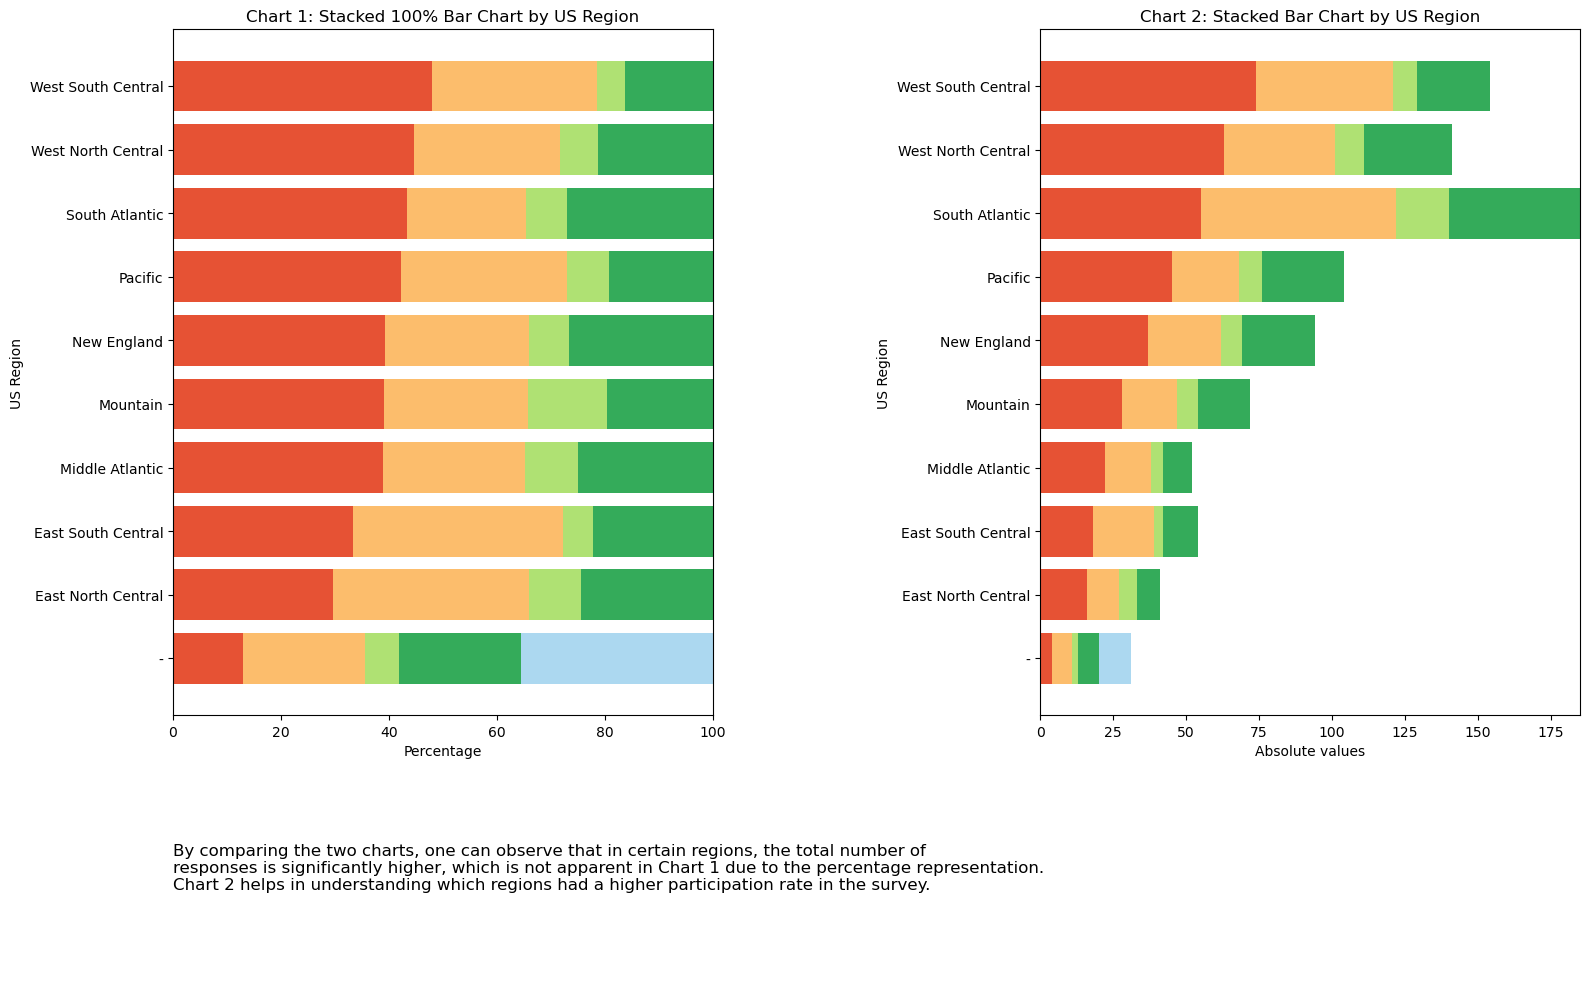

In [57]:
# Creating the grid of plots
fig, axs = plt.subplots(2, 2, figsize=(16, 10), gridspec_kw={'height_ratios': [1, 0.3]})

# Chart 1: 100% stacked bar chart
ax = axs[0, 0]
lefts = np.zeros(len(regions))
for option, color in zip(options, colors):
    heights = pivot_df_percent_T.loc[option].values
    ax.barh(regions, heights, color=color, left=lefts, label=option)
    lefts += heights
ax.set_xlabel('Percentage')
ax.set_ylabel('US Region')
ax.set_title('Chart 1: Stacked 100% Bar Chart by US Region')

# Chart 2: Absolute values stacked bar chart
ax = axs[0, 1]
lefts = np.zeros(len(regions))
for option, color in zip(options, colors):
    heights = pivot_df_T.loc[option].values
    ax.barh(regions, heights, color=color, left=lefts, label=option)
    lefts += heights
ax.set_xlabel('Absolute values')
ax.set_ylabel('US Region')
ax.set_title('Chart 2: Stacked Bar Chart by US Region')

# Description (Chart 3)
axs[1, 0].axis('off')
axs[1, 1].axis('off')
axs[1, 0].text(0, 0.5, 
    "By comparing the two charts, one can observe that in certain regions, the total number of \n"
    "responses is significantly higher, which is not apparent in Chart 1 due to the percentage representation. \n"
    "Chart 2 helps in understanding which regions had a higher participation rate in the survey. \n",
    fontsize=12, verticalalignment='center')

plt.tight_layout()
plt.show()